# Simulación de Eventos Discretos - TP1

TODO: explicar modelo conceptual

Hace falta compilar el simulador con los atómicos nuevos:

## Sm

In [122]:
%%bash

cd model

python3 generate_ma.py

In [2]:
%%bash

mkdir -p logs
src/bin/cd++ -m model/simulation.ma \
             -t 20:00:00:000 \
             -l logs/simulation.log \
             -o simulation.out

PCD++: A Tool to Implement n-Dimensional Cell-DEVS models
Version 3.0 - March 2003
Troccoli A., Rodriguez D., Wainer G., Barylko A., Beyoglonian J., Lopez A.
-----------------------------------------------------------------------------
PCD++ Extended States: An extended and improved version of CD++ for Cell-DEVS
Version 4.1.2 - December 2018
Santi L., Castro, R., Pimás, J.
-----------------------------------------------------------------------------
Discrete Event Simulation Lab
Departamento de Computación
Facultad de Ciencias Exactas y Naturales
Universidad de Buenos Aires, Argentina
-----------------------------------------------------------------------------
Compiled for standalone simulation


Loading models from model/simulation.ma
Loading events from 
Running parallel simulation. Reading models partition from 
Model partition details output to: /dev/null*
Message log: logs/simulation.log
Output to: simulation.out
Tolerance set to: 1e-08
Configuration to show real numbers: Width =

In [3]:
%%bash
head simulation.out

00:00:00:000:0 demand_p0 6802612224.00000
00:00:00:000:0 demand_p1 191631712.00000
00:00:00:000:0 demand_p2 2371400448.00000
00:00:00:000:0 demand_p3 73298080.00000
00:00:00:000:0 demand_p4 2691052288.00000
00:00:00:000:0 demand_p5 604085248.00000
00:00:00:000:0 demand_p6 459764224.00000
00:00:00:000:0 demand_p7 118268616.00000
00:00:00:000:0 demand_p8 1076407936.00000
00:00:00:000:0 demand_p9 731504896.00000


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# definimos los path a los archivos de interés
OUT_FILENAME = "simulation.out"

# definimos los nombres de las columnas en los dataframes de pandas
TIME_COL = 'time'
PORT_COL = 'port'
VALUE_COL = 'value'
# MESSAGE_TYPE_COL = 'message_type'
# MODEL_ORIGIN_COL = 'model_origin'
# MODEL_DEST_COL = 'model_dest'

# parsea cada fila del dataframe
def parse_value(value: str):
    if '?' in value: return None
    is_list = value.strip().startswith("[") and value.strip().endswith("]")
    if is_list:
        return tuple(float(num) for num in value.replace('[', '').replace(']', '').split(', '))
    return float(value)

# conversion VTime a float
def time_to_years(time):
    h, m, s, ms, r = time.split(':')
    return h

df_converters = {
    VALUE_COL: parse_value,
    TIME_COL: time_to_years
}

salida = pd.read_csv(OUT_FILENAME,
                     delimiter=r'(?<!,)\s+',
                     engine='python',  # C engine doesnt work for regex
                     converters=df_converters,
                     names=[TIME_COL, PORT_COL, VALUE_COL]
                    )

# veamos cómo luce el dataframe con los datos de salida
salida[[f'demand_c{0}' == port for port in salida[PORT_COL]]][VALUE_COL].head() # filtro por índice

186     (39365400.0, 1147480.0, 13431900.0, 447934.0, ...
945     (31387100.0, 1077080.0, 12540700.0, 356791.0, ...
1563    (33736100.0, 1256060.0, 11738900.0, 381853.0, ...
2082    (35918700.0, 1428650.0, 11013700.0, 403471.0, ...
3027    (37951500.0, 1596670.0, 10362900.0, 422151.0, ...
Name: value, dtype: object

In [5]:
# TODO: cambiar para que use los nuevos nombres de puertos
def demand_product(product):
    return salida[salida[PORT_COL] == f'demand_p{product}']

def supply_product(product):
    return salida[salida[PORT_COL] == f'supply_p{product}']

def demand_country(country):
    return salida[salida[PORT_COL] == f'demand_c{country}']

def supply_country(country):
    return salida[salida[PORT_COL] == f'supply_c{country}']

def gdp(country):
    return salida[salida[PORT_COL] == f'gdp_c{country}']

In [6]:
def plot_product_demand(product):
    plt.figure(figsize=(10,5))
    plt.plot(TIME_COL, VALUE_COL, data=demand_product(product), marker='o', label='Demanda')
    plt.plot(TIME_COL, VALUE_COL, data=supply_product(product), marker='o', label='Oferta')
    plt.grid(True)
    plt.legend()
    plt.xlabel('Tiempo [años]')
    plt.ylabel('Demanda [$]')
    plt.title(f'Demanda del producto {product} en el tiempo')

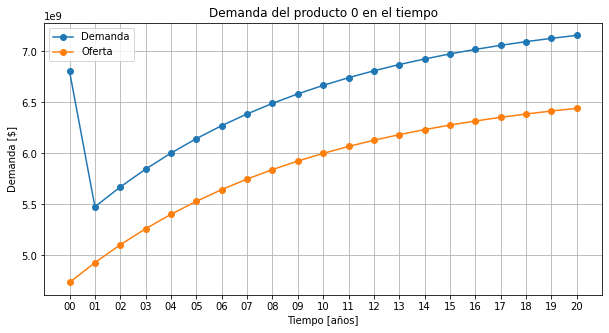

In [7]:
plot_product_demand(0)

In [8]:
def plot_country_export(country):
    df = supply_country(country)
    xs = df[TIME_COL]

    plt.figure(figsize=(10,5))
    product_exports = [[] for _ in df[VALUE_COL].iloc[0]]
    for t in df[VALUE_COL]:
        for i, val in enumerate(t):
            product_exports[i].append(val)
    for exports in product_exports:
        plt.plot(xs, exports, marker='o')
    plt.grid(True)
    plt.xlabel('Tiempo [años]')
    plt.ylabel('Exportaciones [$]')
    plt.title(f'Exportación del pais {country}')

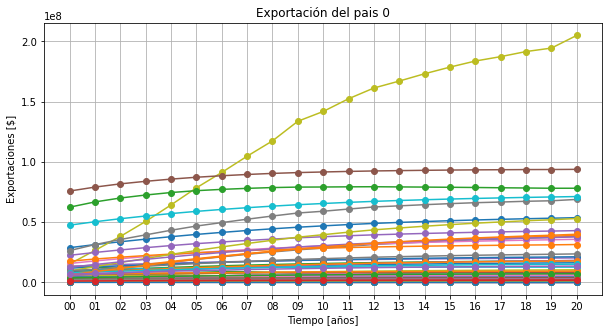

In [9]:
plot_country_export(0)

In [10]:
def plot_gdp(country):
    df = salida[[f'gdp_c{country}' == port for port in salida[PORT_COL]]]
    xs = df[TIME_COL]
    ys = df[VALUE_COL]

    plt.figure(figsize=(10,5))
    plt.plot(xs, ys, marker='o')
    plt.grid(True)
    plt.xlabel('Tiempo [años]')
    plt.ylabel('Demanda [$]')
    plt.title(f'PBI del pais {country} en el tiempo')

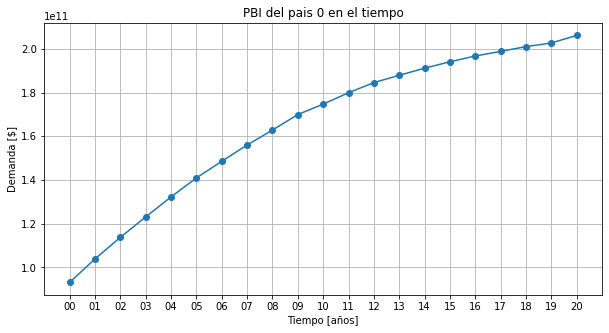

In [11]:
plot_gdp(0)